In [4]:
#Generates input mapping from L4 input layer to L23 network (stored in ../build/FILENAME.csv)
filename = 'input_map1_3' #to save input mapping to
neuron_file = 'neuron_list2' #to load neuron data from (needs to be computed beforehand!)

#layer dimensions (2D)
x_lim = [-1000, 1000]
y_lim = [-1000, 1000]
z_pos = -50

#number of neurons
num_inp = 750

#connectivity (L4->L23-E/I)
import numpy as np
#p0 = [0.4, 0.4]
#lmbda = [200, 200]
p0 = [0.01, 0.01]
lmbda = [np.inf, np.inf]

#neuron type
type_inp = 'LIF_inp'

#synapses
num_syn = [100, 500] #uniformly distributed

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [6]:
#load neuron list
nrn_list = pd.DataFrame.from_csv('../build/' + neuron_file + '.csv', sep=' ')
idx_E = np.where(nrn_list.type=='LIF_exc')[0]
idx_I = np.where(nrn_list.type=='LIF_inh')[0]
nrn_list.head()

,type,x,y,z,tuning,morphology,cell_par
index,,,,,,,
0,LIF_exc,594.806,158.659,-35.560,None,None,None
1,LIF_exc,-614.429,-683.724,-9.027,None,None,None
2,LIF_exc,525.831,313.198,-47.719,None,None,None
3,LIF_exc,996.022,-93.373,7.265,None,None,None
4,LIF_exc,351.254,-195.564,25.087,None,None,None


In [11]:
#generate positions
x_pos = list(np.round(np.random.rand(num_inp)*np.diff(x_lim)+x_lim[0], 3))
y_pos = list(np.round(np.random.rand(num_inp)*np.diff(y_lim)+y_lim[0], 3))

In [12]:
#distance-dependent connection probability
p_dist_E = lambda d: p0[0]*np.exp(-1.0*d/lmbda[0]) #distance-dependent connection probability
p_dist_I = lambda d: p0[1]*np.exp(-1.0*d/lmbda[1]) #distance-dependent connection probability

In [6]:
#generate input connection mapping
d_E = [] #connection distances
d_I = [] #connection distances
s_E = [] #synapses per connection
s_I = [] #synapses per connection

col_tgt = []
col_src = []
col_x = []
col_y = []
col_type = []
col_N = []
#L4->L23-E
for tgt in idx_E:
    tgt_pos = np.array([nrn_list.x[tgt], nrn_list.y[tgt], nrn_list.z[tgt]])
    for src in range(num_inp):
        src_pos = np.array([x_pos[src], y_pos[src], z_pos])
        d = np.sqrt(np.sum((tgt_pos-src_pos)**2)) #Euclidean distance
        if np.random.rand()<p_dist_E(d):
            d_E.append(d)
            col_tgt.append(tgt)
            col_src.append(src)
            col_x.append(x_pos[src])
            col_y.append(y_pos[src])
            col_type.append(type_inp)
            n_syn = np.random.randint(num_syn[0], num_syn[1]+1)
            s_E.append(n_syn)
            col_N.append(n_syn)
#L4->L23-I
for tgt in idx_I:
    tgt_pos = np.array([nrn_list.x[tgt], nrn_list.y[tgt], nrn_list.z[tgt]])
    for src in range(num_inp):
        src_pos = np.array([x_pos[src], y_pos[src], z_pos])
        d = np.sqrt(np.sum((tgt_pos-src_pos)**2)) #Euclidean distance
        if np.random.rand()<p_dist_I(d):
            d_I.append(d)
            col_tgt.append(tgt)
            col_src.append(src)
            col_x.append(x_pos[src])
            col_y.append(y_pos[src])
            col_type.append(type_inp)
            n_syn = np.random.randint(num_syn[0], num_syn[1]+1)
            s_I.append(n_syn)
            col_N.append(n_syn)

In [7]:
p_E = 1.*len(d_E)/(len(idx_E)*num_inp)
p_I = 1.*len(d_I)/(len(idx_I)*num_inp)
print('L4->L23-E: p=%.2f%%, %.2f synapses per connection'%(100.*p_E, np.mean(s_E)))
print('L4->L23-I: p=%.2f%%, %.2f synapses per connection'%(100.*p_I, np.mean(s_I)))

L4->L23-E: p=1.02%, 299.03 synapses per connection
L4->L23-I: p=1.01%, 303.36 synapses per connection


In [8]:
#save data
inp_dict = {'index': col_tgt, 'src_gid': col_src, 'src_vis_x': col_x, 'src_vis_y': col_y, 'presyn_type': col_type, 'N_syn': col_N}
inp_list = pd.DataFrame(inp_dict, columns=['index', 'src_gid', 'src_vis_x', 'src_vis_y', 'presyn_type', 'N_syn'])
inp_list.to_csv('../build/' + filename + '.csv', sep=' ', index=False)
inp_list.head()

,index,src_gid,src_vis_x,src_vis_y,presyn_type,N_syn
0,0,13,252.929,578.746,LIF_inp,420
1,0,47,361.671,58.069,LIF_inp,387
2,0,144,577.157,-525.139,LIF_inp,235
3,0,278,246.463,121.333,LIF_inp,409
4,0,302,431.210,489.910,LIF_inp,257


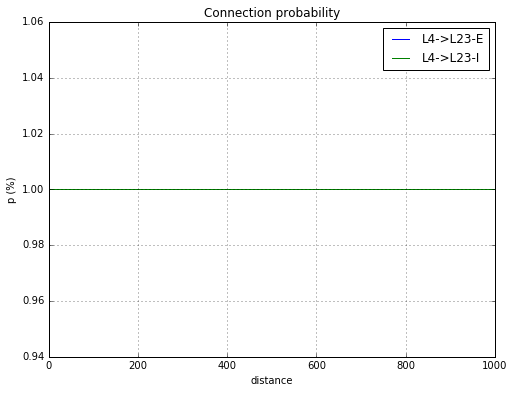

In [9]:
#plot connectivity profiles
d_axis = np.arange(0, 1000)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(d_axis, 100.*p_dist_E(d_axis), label='L4->L23-E')
ax.plot(d_axis, 100.*p_dist_I(d_axis), label='L4->L23-I')
ax.set_xlabel('distance')
ax.set_ylabel('p (%)')
ax.set_title('Connection probability')
ax.grid(True)
ax.legend()
fig.savefig('../build/' + filename + '_prob.png', dpi=600)

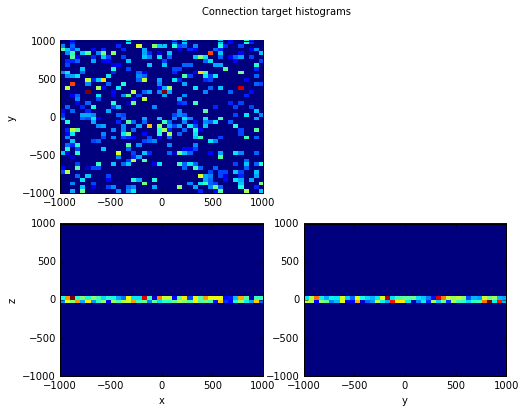

In [10]:
#plot target connectivity histograms
n_bins = np.arange(-1000, 1001, 50)
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].hist2d(nrn_list.x[col_tgt], nrn_list.y[col_tgt], n_bins)
ax[0, 0].set_ylabel('y')
ax[0, 1].set_visible(False)
ax[1, 0].hist2d(nrn_list.x[col_tgt], nrn_list.z[col_tgt], n_bins)
ax[1, 0].set_xlabel('x')
ax[1, 0].set_ylabel('z')
ax[1, 1].hist2d(nrn_list.y[col_tgt], nrn_list.z[col_tgt], n_bins)
ax[1, 1].set_xlabel('y')
fig.suptitle('Connection target histograms')
fig.savefig('../build/' + filename + '_targhist.png', dpi=600)

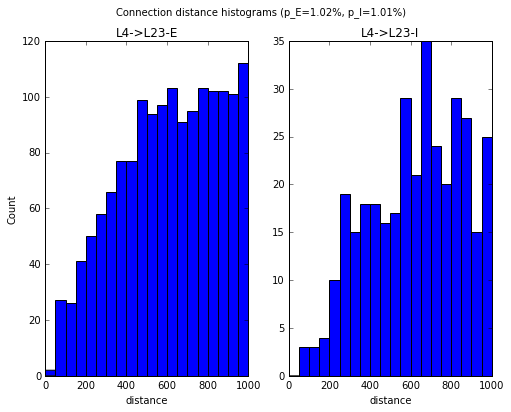

In [11]:
#plot distance histograms
n_bins = np.arange(0, 1001, 50)
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].hist(d_E, n_bins)
ax[0].set_xlabel('distance')
ax[0].set_ylabel('Count')
ax[0].set_title('L4->L23-E')
ax[1].hist(d_I, n_bins)
ax[1].set_xlabel('distance')
ax[1].set_title('L4->L23-I')
fig.suptitle('Connection distance histograms (p_E=%.2f%%, p_I=%.2f%%)'%(100.*p_E, 100.*p_I))
fig.savefig('../build/' + filename + '_disthist.png', dpi=600)

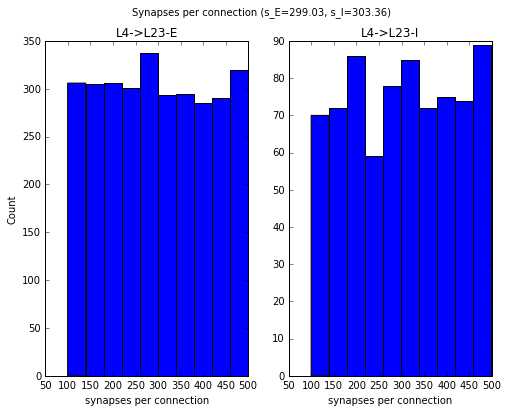

In [12]:
#plot number of synapses histograms
n_bins = np.arange(num_syn[0], num_syn[1]+2, max(1, np.round(0.1*np.diff(num_syn))))-0.5
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].hist(s_E, n_bins)
ax[0].set_xlabel('synapses per connection')
ax[0].set_ylabel('Count')
ax[0].set_title('L4->L23-E')
ax[1].hist(s_I, n_bins)
ax[1].set_xlabel('synapses per connection')
ax[1].set_title('L4->L23-I')
fig.suptitle('Synapses per connection (s_E=%.2f, s_I=%.2f)'%(np.mean(s_E), np.mean(s_I)))
fig.savefig('../build/' + filename + '_synhist.png', dpi=600)

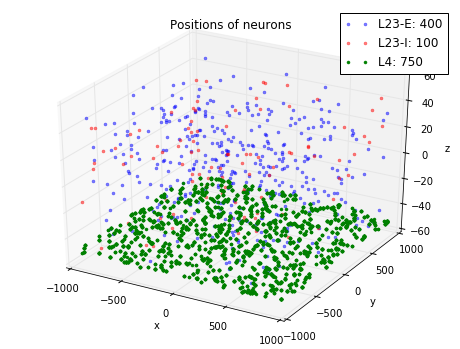

In [13]:
#plot positions
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_exc'], '.b', alpha=0.5, label='L23-E: %d'%(np.sum(np.array(nrn_list.type)=='LIF_exc')))
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_inh'], '.r', alpha=0.5, label='L23-I: %d'%(np.sum(np.array(nrn_list.type)=='LIF_inh')))
ax.plot(col_x, col_y, z_pos, '.g', label='L4: %d'%(num_inp))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Positions of neurons')
ax.legend()
fig.savefig('../build/' + filename + '_pos.png', dpi=600)